In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
# variables declearation 

ppgData = pd.DataFrame()   # to store dataFrame from files like 1.csv
featureDf = pd.DataFrame()  # to store all features like PCA and Systolic and Diastolic of all data
ppg_pca = pd.DataFrame()    # to store all pca of all data 
ABP_sys_dia = pd.DataFrame() # to store all systolic and diastolic obtained from ABP signals of all data



In [ ]:
# to do pca 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)  #n_components means number of pca components

In [ ]:
'''
this loop to read each file like 1.csv of ppg signals and perform pca and store it in ppg_pca dataframe
'''

for i in range(2,23):
  filename = "/content/gdrive/MyDrive/data/PPG_/"+str(i)+".csv"
  df = pd.read_csv(filename)
  print(df.shape)
  pca.fit(df)
  pca1 = pca.transform(df)
  ppg_pca  = pd.concat([ppg_pca , pd.DataFrame(data = pca1)], axis = 0)
  

(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(10001, 1024)
(5831, 1024)


In [ ]:
ppg_pca.shape

(205851, 3)

In [ ]:
ppg_pca.head()
ppg_pca.info()
ppg_pca.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205851 entries, 0 to 5830
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       205851 non-null  float64
 1   1       205851 non-null  float64
 2   2       205851 non-null  float64
dtypes: float64(3)
memory usage: 6.3 MB


(205851, 3)

In [ ]:
ppg_pca.head()

,0,1,2
0,0.443430,0.009090,0.108482
1,0.107433,-0.032776,0.342484
2,0.464448,0.469773,0.438909
3,-0.084022,0.014186,-0.033143
4,-0.220814,0.041440,0.028809


In [ ]:
ABP_sys_dia = pd.read_csv("/content/gdrive/MyDrive/data/systolic and diastolic/ABP_sys_dia.csv")
ABP_sys_dia = ABP_sys_dia.loc[20002:]
ABP_sys_dia.head()
ABP_sys_dia.shape


(205851, 2)

In [ ]:
ABP_sys_dia.head()

,systolic,diastolic
20002,144.43,52.947
20003,144.43,52.947
20004,143.36,52.752
20005,146.48,54.998
20006,177.11,65.060


In [ ]:
featureDf = pd.DataFrame()

In [ ]:
ABP_sys_dia["systolic"].values

array([144.43, 144.43, 143.36, ..., 103.01, 102.67, 114.34])

In [ ]:
featureDf["systolic"] = ABP_sys_dia["systolic"].values

In [ ]:
featureDf["diastolic"] = ABP_sys_dia["diastolic"].values

In [ ]:
featureDf.head()

,systolic,diastolic
0,144.43,52.947
1,144.43,52.947
2,143.36,52.752
3,146.48,54.998
4,177.11,65.060


In [ ]:
featureDf["pca1"] = ppg_pca[0].values

In [ ]:
featureDf["pca2"] = ppg_pca[1].values

In [ ]:
featureDf["pca3"] = ppg_pca[2].values

In [ ]:
featureDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205851 entries, 0 to 205850
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   systolic   205851 non-null  float64
 1   diastolic  205851 non-null  float64
 2   pca1       205851 non-null  float64
 3   pca2       205851 non-null  float64
 4   pca3       205851 non-null  float64
dtypes: float64(5)
memory usage: 7.9 MB


In [ ]:
featureDf.to_csv("sys_dia_pca1_pca2.csv")

In [ ]:
from sklearn.cluster import KMeans
X = featureDf.values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_


In [ ]:
labels.shape

(205851,)

In [ ]:
featureDf["cluster"] = labels

In [ ]:
featureDf.head()

,systolic,diastolic,pca1,pca2,cluster
0,144.43,52.947,0.448304,0.068589,0
1,144.43,52.947,0.108880,-0.028446,0
2,143.36,52.752,0.464056,0.471354,0
3,146.48,54.998,-0.089028,-0.016251,0
4,177.11,65.060,-0.213127,0.035350,2


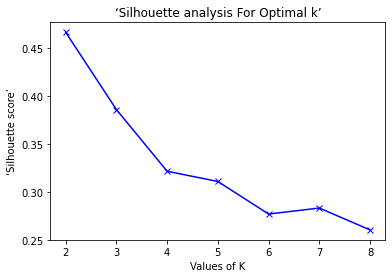

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(featureDf)
  cluster_labels = kmeans.labels_
  
  # silhouette score
  silhouette_avg.append(silhouette_score(featureDf, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel('Values of K') 
plt.ylabel("‘Silhouette score’") 
plt.title("‘Silhouette analysis For Optimal k’")
plt.show()